In [2]:
import numpy as np
import matplotlib.pyplot as pl

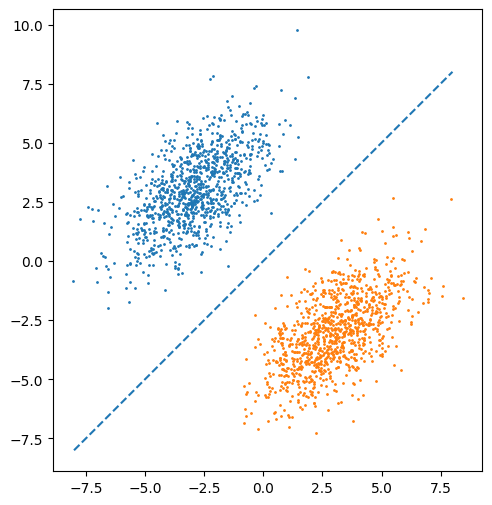

In [3]:
#
# Linearly separable dataset
#
np.random.seed(1)

ang = -45 * np.pi / 180
M = np.array([
    [1.0, 0.0],
    [0.0, 2.0]
]) @ np.array([
    [np.cos(ang), np.sin(ang)],
    [-np.sin(ang), np.cos(ang)]
])
L = 3
x0 = np.random.randn(1000, 2) @ M + np.array([-L, L])
x1 = np.random.randn(1000, 2) @ M + np.array([L, -L])

figure = pl.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1)
ax.scatter(x0[:, 0], x0[:, 1], s=1)
ax.scatter(x1[:, 0], x1[:, 1], s=1)

#
# Separation
#
ax.plot([-8, 8], [-8, 8], '--')
ax.set_aspect('equal');

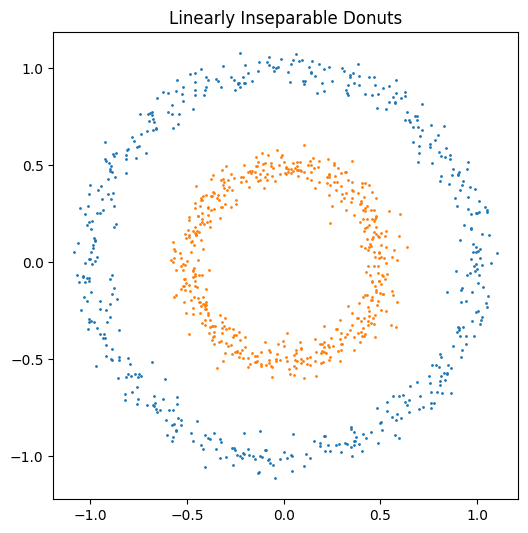

In [4]:
#
# Linearly inseperable dataset
#

import sklearn.datasets

x_donuts, y_donuts = sklearn.datasets.make_circles(1000, noise=0.05, factor=0.5)
x0 = x_donuts[y_donuts == 0]
x1 = x_donuts[y_donuts == 1]

figure = pl.figure(figsize=(6,10))
ax = pl.gca()
ax.scatter(x0[:, 0], x0[:, 1], s=1)
ax.scatter(x1[:, 0], x1[:, 1], s=1)
ax.set_aspect('equal')
ax.set_title('Linearly Inseparable Donuts');

In [5]:
def kernel(x):
    r = np.linalg.norm(x, axis=-1)
    return np.concatenate([x, r[:, None]], axis=-1)

In [6]:
kernel(x_donuts)[:5].round(3)

array([[ 0.034, -0.575,  0.576],
       [-0.078,  0.552,  0.558],
       [-0.819, -0.713,  1.086],
       [ 0.09 , -0.518,  0.526],
       [-0.452,  0.139,  0.473]])

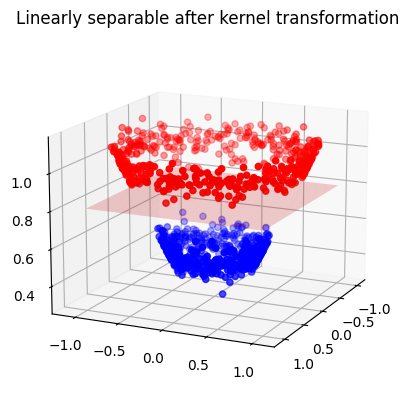

In [7]:
#
# Linear separation in higher dimensions
#

x_new = kernel(x_donuts)
x0_new = x_new[y_donuts == 0]
x1_new = x_new[y_donuts == 1]

fig = pl.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(15, 25)
ax.scatter(x0_new[:,0], x0_new[:,1], x0_new[:,2], c='red')
ax.scatter(x1_new[:,0], x1_new[:,1], x1_new[:,2], c='blue')
ax.set_title('Linearly separable after kernel transformation')

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z = 0 * xx + 0.8
ax.plot_surface(xx, yy, z, alpha=0.2, color='red');

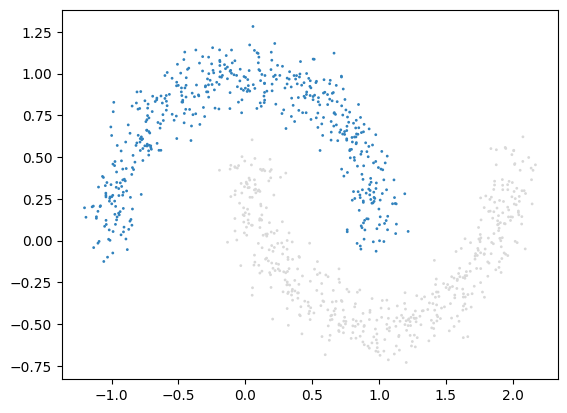

In [8]:
import sklearn.datasets
import pandas as pd

pl.set_cmap('tab20c')
(x_moon, y_moon) = sklearn.datasets.make_moons(1000, noise=0.1)
pl.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, s=1);

In [9]:
import torch
import torch.nn as nn

In [10]:
class MLPBinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = nn.functional.softmax(x, dim=1)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

In [11]:
x_input = torch.tensor(x_moon, dtype=torch.float32)
y_true = torch.tensor(y_moon, dtype=torch.float32).reshape(-1, 1)

In [12]:
model = MLPBinaryClassifier(2, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss = nn.functional.binary_cross_entropy

In [14]:
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    l = loss(model(x_input), y_true)
    l.backward()
    optimizer.step()
    if epoch % (epochs//10) == 0:
        with torch.no_grad():
            print(epoch, l.numpy())
print(epoch, l.detach().numpy())

0 9.595555e-07
1000 5.5768487e-07
2000 3.2642058e-07
3000 1.933474e-07
4000 1.1494534e-07
5000 6.836174e-08
6000 4.0604608e-08
7000 2.4209884e-08
8000 1.4523328e-08
9000 8.544526e-09
9999 5.1513647e-09


In [15]:
x_lim = np.linspace(-1.5, 2.5, 100)
y_lim = np.linspace(-1, 1.5, 100)
xx, yy = np.meshgrid(x_lim, y_lim)
x_input = np.array([xx.ravel(), yy.ravel()]).T
x_input = torch.tensor(x_input, dtype=torch.float32)
x_input.shape

torch.Size([10000, 2])

In [16]:
model.eval()
z = model(x_input)
z = z.reshape(100, 100).detach().numpy()
z.shape

(100, 100)

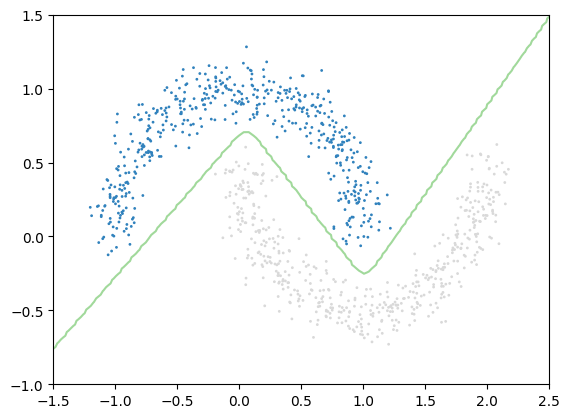

In [17]:
pl.set_cmap('tab20c')
pl.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, s=1)
pl.contour(xx, yy, z, levels=1);

In [18]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Softmax(dim=1),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        return self.layers(x)

In [19]:
#
# train
#

model = MLP(2, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss = nn.functional.binary_cross_entropy

loss(model(x_input), y_true)

ValueError: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([10000, 1])) is deprecated. Please ensure they have the same size.